In [ ]:
# 기본 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# 머신러닝 라이브러리 불러오기
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

### **데이터 불러오기**
---
- 드라이브에 마운트하여 불러오기

In [ ]:
# 데이터 불러오기 위한 마운트 및 경로 지정
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/머러데사')

Mounted at /content/drive


In [ ]:
# 컴퓨터의 데이터를 불러오는 방법
### from google.colab import files
### uploaded = files.upload()
df = pd.read_csv('data/sales data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### 원핫인코딩
---
- pandas의 `get_dummies()` 사용

In [ ]:
# 명목형 변수와 연속형 변수 구분
categorical_features = ['Channel', 'Region']
contiunous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen',
                      'Detergents_Paper', 'Delicassen']

# 명목형 변수 원핫인코딩
for i in categorical_features:
  dummies = pd.get_dummies(df[i], prefix=i)
  df = pd.concat([df, dummies], axis=1)
  df.drop(i, axis=1, inplace=True)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,False,True,False,False,True
1,7057,9810,9568,1762,3293,1776,False,True,False,False,True
2,6353,8808,7684,2405,3516,7844,False,True,False,False,True
3,13265,1196,4221,6404,507,1788,True,False,False,False,True
4,22615,5410,7198,3915,1777,5185,False,True,False,False,True


### **스케일링**
---
- `MinMaxScaler()` : 데이터의 최솟값과 최대값을 활용

In [ ]:
# 스케일링 : MinMaxScaling
mms = MinMaxScaler()
mms.fit(df)
data_transformed = mms.transform(df)

df_transformed = pd.DataFrame(data_transformed, columns=df.columns)
df_transformed.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,0.0,1.0,0.0,0.0,1.0
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,0.0,1.0,0.0,0.0,1.0
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,0.0,1.0,0.0,0.0,1.0
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,1.0,0.0,0.0,0.0,1.0
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,0.0,1.0,0.0,0.0,1.0


### **최적의 k선정 및 Kmeans 수행**

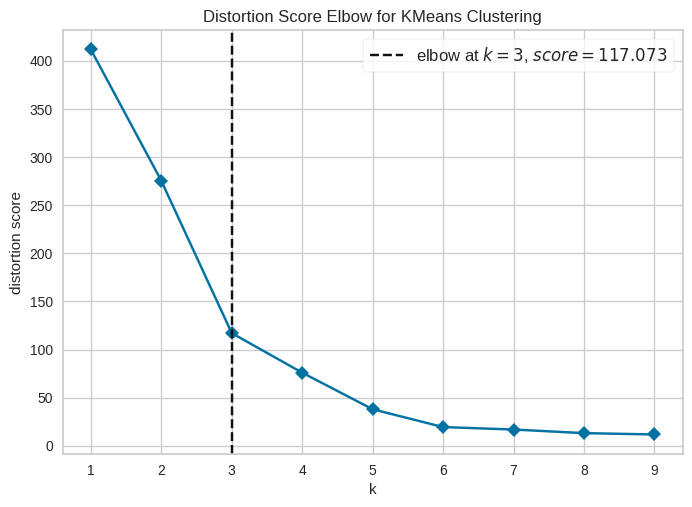

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# 최적의 k값을 찾기 위한 시각화
from yellowbrick.cluster import KElbowVisualizer
k=0
km = KMeans(n_clusters=k, random_state=7)
visualizer = KElbowVisualizer(km, k=(1,10), timings=False)
visualizer.fit(df_transformed)
visualizer.show()

## **실루엣 계수**
---
- *실루엣 계수* : 같은 군집에 속한 데이터포인트들과의 거리의 평균과 다른 군집에 속한 데이터포인트들과의 거리의 평균으로 군집의 성능을 평가하는 지표
- 0과 1사이의 값을 가지며 1에 가까울수록 군집화가 잘 진행됐다고 판단.

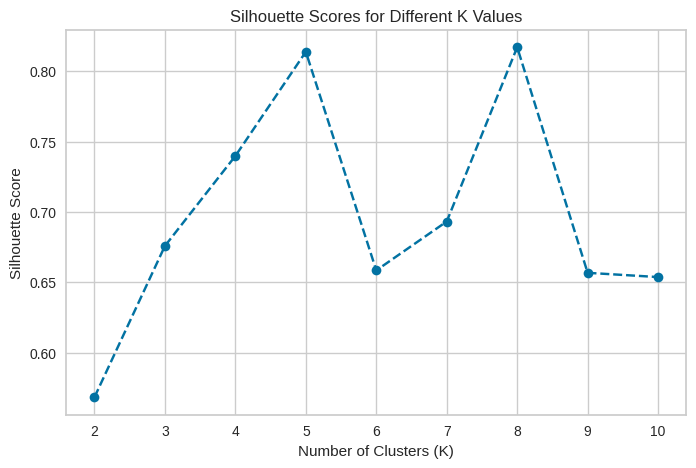

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = []

# K 값을 2부터 10까지 반복
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_transformed)
    df['cluster'] = km.labels_

    # 실루엣 계수 계산
    score = silhouette_score(df_transformed, df['cluster'])
    silhouette_scores.append(score)

# 실루엣 계수를 시각화
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='b')
plt.xticks(range(2, 11))
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different K Values')
plt.show()

### **실루엣계수와 Kmeans**
---
- 실루엣 계수의 결과를 바탕으로 5개의 클러스터 결정
- `silhouette_samples` 메소드로 시각화  

In [ ]:
# 시각화 결과에 따라 5로 해보면
k = 5
km = KMeans(n_clusters=k, random_state=42)
km.fit(df_transformed)
df['cluster'] = km.labels_

# 실루엣계수로 군집화 결과 판단
from sklearn.metrics import silhouette_score
print('실루엣계수 :', silhouette_score(df_transformed, df['cluster']))

실루엣계수 : 0.8139267553776266


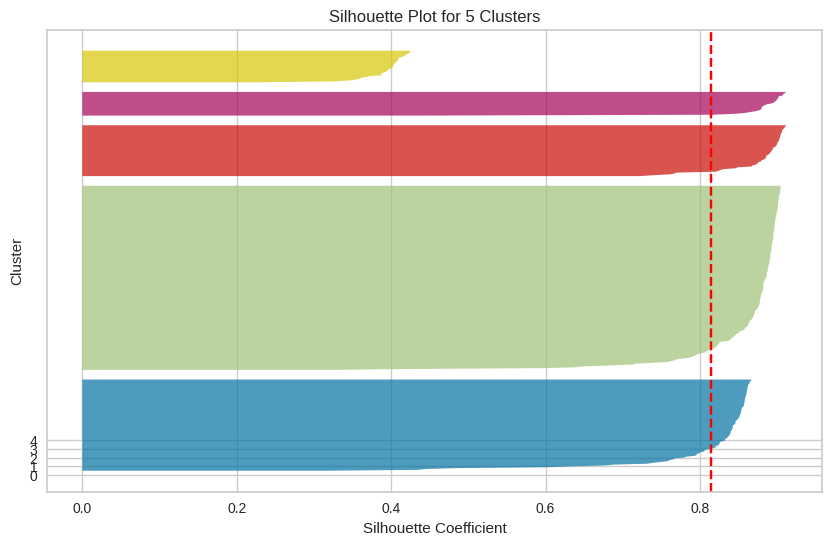

In [ ]:
# 실루엣 계수 시각화
from sklearn.metrics import silhouette_samples

# KMeans 군집화 수행
k = 5
km = KMeans(n_clusters=k, random_state=42)
labels = km.fit_predict(df_transformed)

# 실루엣 계수 계산
silhouette_vals = silhouette_samples(df_transformed, df['cluster'])
silhouette_avg = silhouette_score(df_transformed, df['cluster'])

# 실루엣 계수 시각화
plt.figure(figsize=(10, 6))
y_lower = 10

for i in range(k):
    # 해당 군집의 샘플 수
    ith_cluster_silhouette_vals = silhouette_vals[labels == i]
    ith_cluster_silhouette_vals.sort()

    # 군집의 높이
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    # 군집의 실루엣 계수 플롯
    plt.fill_betweenx(range(y_lower, y_upper), ith_cluster_silhouette_vals, alpha=0.7)

    # 다음 군집의 시작 위치 업데이트
    y_lower = y_upper + 10

plt.title(f'Silhouette Plot for {k} Clusters')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Cluster')
plt.axvline(x=silhouette_avg, color='red', linestyle='--')

# yticks 설정 수정
plt.yticks([i * 10 + 5 for i in range(k)], range(k))
plt.show()

### **정규분포로 변환해본다면**
---
- 피처의 분포 관찰
- 데이터의 피처들이 모두 첨도가 매우 높고 오른쪽으로 꼬리가 길게 늘어진 모양

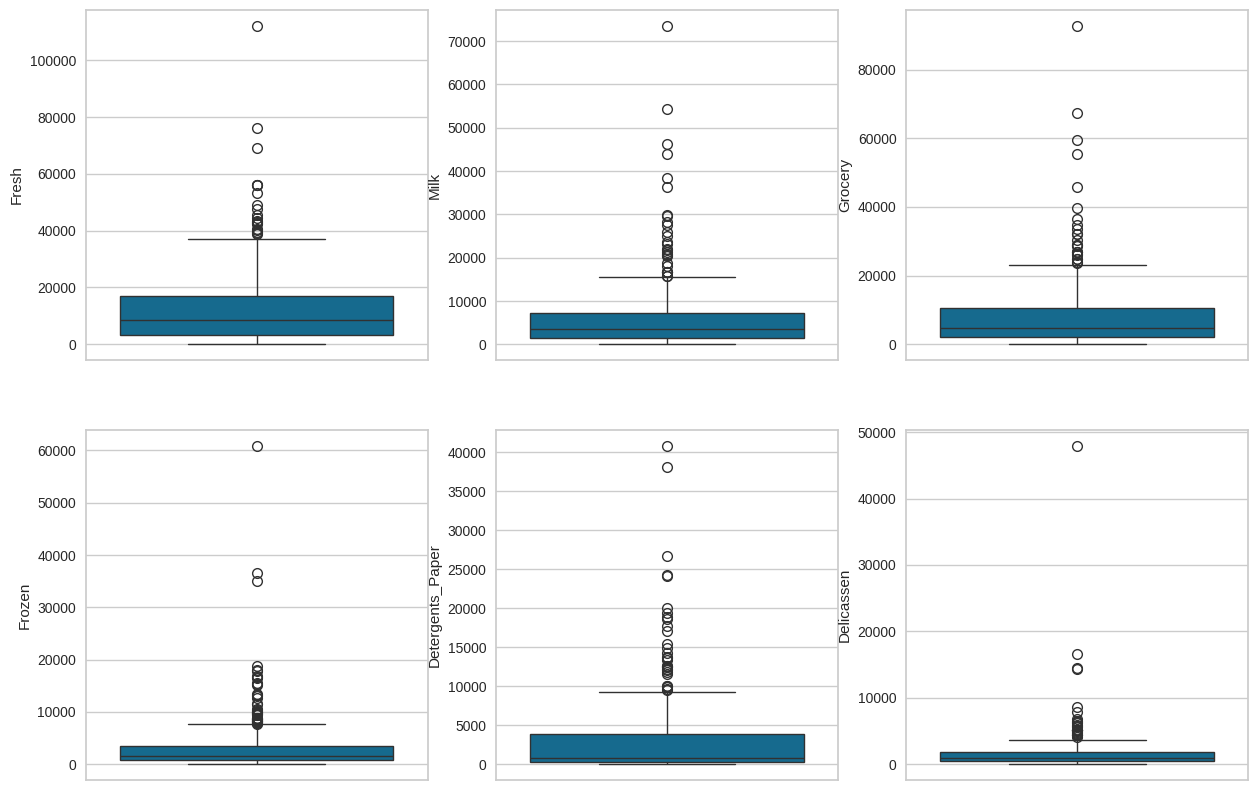

In [ ]:
# 피처 분포 확인
import seaborn as sns
fig, ax = plt.subplots(2,3, figsize=(15,10))
for i,col in enumerate(contiunous_features):
  ax = ax.flatten()
  sns.boxplot(df[col], ax=ax[i])
plt.show()

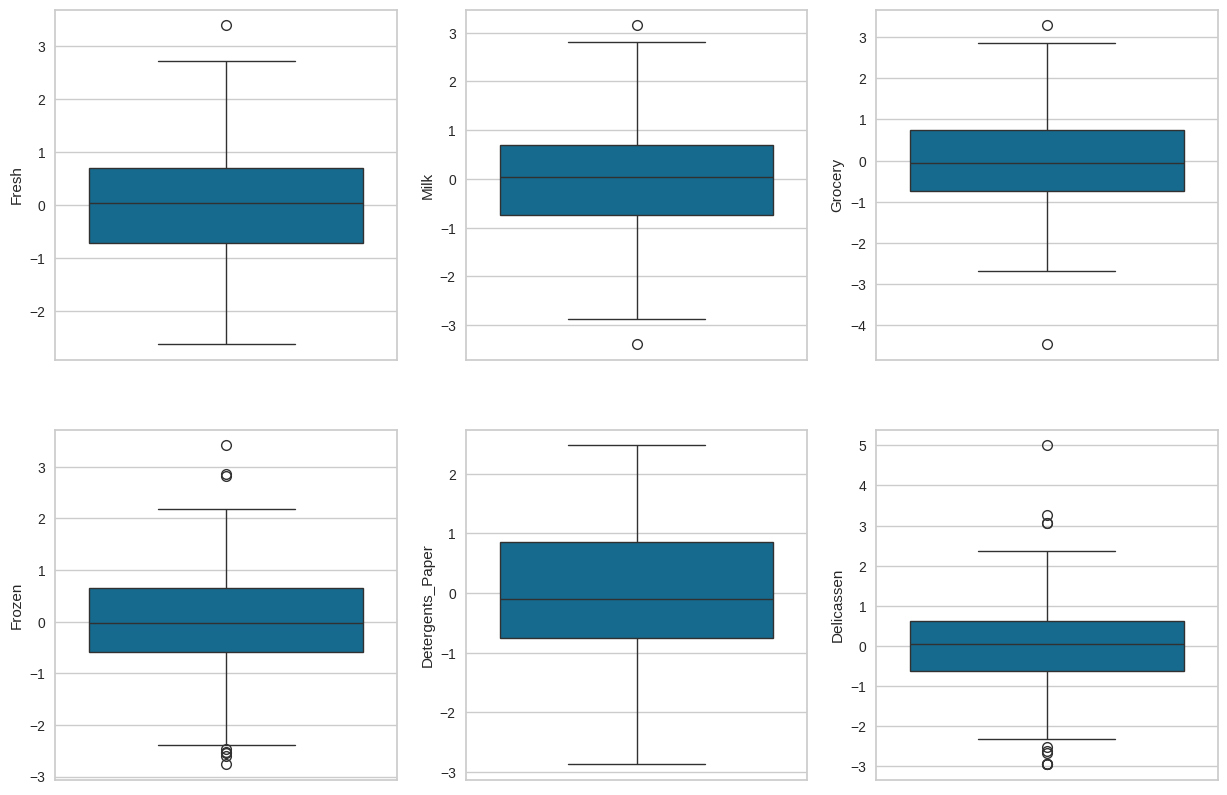

In [ ]:
# 정규분포 형태로 => 피처의 분포를 더욱 펴서 군집화의 성능은?
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')
df_t = df.copy()

# 연속형 변수에 대해 적용
for i in contiunous_features:
  df_t[i] = pt.fit_transform(df_t[[i]])

fig, ax = plt.subplots(2,3, figsize=(15,10))
for i,col in enumerate(contiunous_features):
  ax = ax.flatten()
  sns.boxplot(df_t[col], ax=ax[i])
plt.show()

In [ ]:
# 스케일링 : MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
df_transformed = ss.fit_transform(df_t)

## **KMeans 군집화**

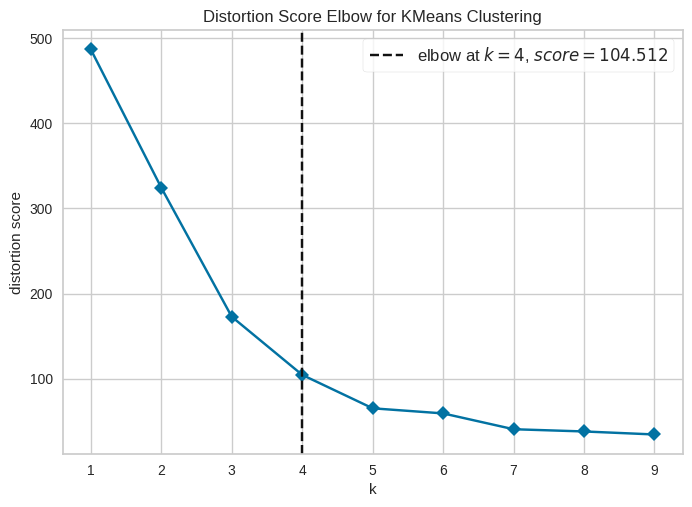

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# 최적의 k값을 찾기 위한 시각화
from yellowbrick.cluster import KElbowVisualizer
k=0
km = KMeans(n_clusters=k, random_state=7)
visualizer = KElbowVisualizer(km, k=(1,10), timings=False)
visualizer.fit(df_transformed)
visualizer.show()

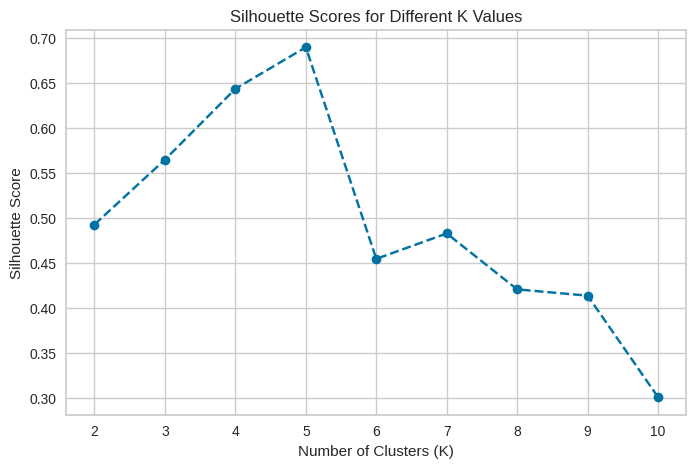

In [ ]:
silhouette_scores = []

# K 값을 2부터 10까지 반복
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_transformed)
    df_t['cluster'] = km.labels_

    # 실루엣 계수 계산
    score = silhouette_score(df_transformed, df_t['cluster'])
    silhouette_scores.append(score)

# 실루엣 계수를 시각화
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='b')
plt.xticks(range(2, 11))
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different K Values')
plt.show()

## **iris 데이터와 클러스터링**
---
- iris를 단순하게 군집화했을 떄 구하고자하는 target에 따라 나뉠까?

In [ ]:
# iris의 KMeans 다시
iris = datasets.load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# accuracy의 쉬운 측정을 위해 3개의 군집으로 나누어 결과 관찰
k=3
km = KMeans(n_clusters=k, random_state=7)
km.fit(df)
df['cluster'] = km.labels_
accracy_df = pd.DataFrame({'pred' : pd.Series(km.labels_), 'true' : pd.Series(iris.target)})
accracy_df = accracy_df.groupby(['true', 'pred']).size().reset_index(name='count')
accracy_df

,true,pred,count
0,0,0,50
1,1,1,3
2,1,2,47
3,2,1,36
4,2,2,14


### **혼동행렬 구하기**
- 군집의 결과로 무작위 부여된 숫자와 실제 target에 매핑된 숫자가 달라서 아래와 같이 결과가 나옴

In [ ]:
# 혼동행렬의 형태로 표현
result_df = pd.DataFrame({'true' : list(range(k))})
for i in range(k) :
  pred_list = []
  for j in range(k) :
    pred_list.append(accracy_df[(accracy_df['true'] == i) & (accracy_df['pred'] == j)]['count'].sum())
  result_df[f'{i}'] = pred_list
result_df.set_index('true', inplace=True)
result_df

,0,1,2
true,,,
0,50,0,0
1,0,3,36
2,0,47,14


### **정확도 계산**
---
- `combinations` 메소드로 정확도 산출
- 각 행의 최대값을 맞춘 개수로 계산

In [ ]:
# accuracy 도출
import itertools
k = 3

# 2개씩 뽑는 모든 조합 생성
combinations_list = list(itertools.combinations(range(k), 2))

acc_list = []
for comb in combinations_list:
    result = result_df.iloc[list(comb), list(comb)]

    right_count = [] # 맞은 개수
    total_count = [] # 해당 2*2 행렬에 포함된 모든 샘플 개수

    # 각 열에 대해 최대값과 총합 계산
    for j in result.columns:
        num = result[j].max()  # 최대값
        right_count.append(num)
        total = result[j].sum()  # 총합
        total_count.append(total)

    # 정확도 계산
    acc = np.sum(right_count) / np.sum(total_count)
    acc_list.append(acc)

# 정확도 리스트 출력
np.mean(acc_list) # (1+1+0.83)/3 = 0.943...

0.9433333333333334

## **신용카드 데이터 군집화**

In [ ]:
# 추가 라이브러리 불러오기 _ for 밀도기반군집
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

In [ ]:
# 신용카드 데이터 불러오기
df = pd.read_csv('data/credit card.csv')
df = df.drop('CUST_ID', axis=1)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### **결측치 처리**
---
- MINIMUM_PAYMENTS와 밀접한 관련있는 변수A를 찾아 A를 명목형 변수 A_cut으로 만든 뒤 A_cut의 의 그룹별 평균으로 대치.
- 그리고는 CREDIT_LIMIT에서 결측치가 발생한 행은 1개이므로 제거

In [ ]:
# 결측치 확인
df.isnull().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


In [ ]:
# 상관관계
corr_matrix = df.corr()

# MINIMUM_PAYMENTS과의 상관관계가 0.3 이상인 컬럼 선택
min_payments_corr = corr_matrix['MINIMUM_PAYMENTS']
high_corr_columns = min_payments_corr[abs(min_payments_corr) >= 0.3]
high_corr_columns

,MINIMUM_PAYMENTS
BALANCE,0.398684
MINIMUM_PAYMENTS,1.000000


- BALANCE와 제법 상관관계를 보임

In [ ]:
import pandas as pd

# 원본 데이터프레임 복사
df_t = df.copy()

# 'BALANCE'를 기준으로 5개의 구간 생성
df_t['BALANCE_cut'] = pd.qcut(df_t['BALANCE'], 5, labels=False)

# 각 구간별로 'MINIMUM_PAYMENTS'의 결측치를 해당 구간의 평균으로 대체
df_t['MINIMUM_PAYMENTS'] = df_t['MINIMUM_PAYMENTS'].groupby(df_t['BALANCE_cut']).transform(lambda x: x.fillna(x.median()))
df_t = df_t.dropna()
df_t.drop('BALANCE_cut', axis=1, inplace=True)
# 결측치 개수 확인
df_t.isnull().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


- BALANCE를 5개의 계급으로 나누고 각 계급의 MINIMUM_PAYMENTS의 평균으로 MINIMUM_PAYMENTS 결측치 대치

### **피처셀렉션**
---
- 군집화를 하는 것이므로 데이터의 라벨이 없음 => 사용가능한 방법 제한적
- `VarianceThreshold()` : 임계치를 정하여 해당 임계치보다 분산이 낮으면 피처 제거
- (주성분 분석을 하긴하지만) 미리 차원의 저주를 예방하고자 VarianceThreshold를 통해 분산이 낮은 피처는 배제

In [ ]:
# 임계값 설정하여 selector 만들기
from sklearn.feature_selection import VarianceThreshold
threshold = 0.3
selector = VarianceThreshold(threshold)
X_reduced = selector.fit_transform(df_t)

# 선택된 특성 확인
selected_features = df_t.columns[selector.get_support(indices=True)]
print('selected_features 선택된 피처 ', selected_features)

selected_features 선택된 피처  Index(['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT',
       'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE'],
      dtype='object')


- 분산이 낮은 'BALANCE_FREQUENCY', 'CASH_ADVANCE_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY', 'PRC_FULL_PAYMENT' 등의 피처는 유의미한 정보를 주지 못할 것으로 판단하여 제거

### **차원축소(PCA)**
---
- 적절한 차원의 개수 선정하기 위해 누적분산 참고
- 데이터의 설명력을 보존하기 위해선 일반적으로 80%, 90%가 넘기는 지점에서 선정

차원의 개수가 2 일 때
누적 분산은 0.5536277057768588
차원의 개수가 3 일 때
누적 분산은 0.6551201317649729
차원의 개수가 4 일 때
누적 분산은 0.7421589313172823
차원의 개수가 5 일 때
누적 분산은 0.8113009944812506
차원의 개수가 6 일 때
누적 분산은 0.8757312205849924
차원의 개수가 7 일 때
누적 분산은 0.9207947296637838
차원의 개수가 8 일 때
누적 분산은 0.951889586272492
차원의 개수가 9 일 때
누적 분산은 0.9817462998278906


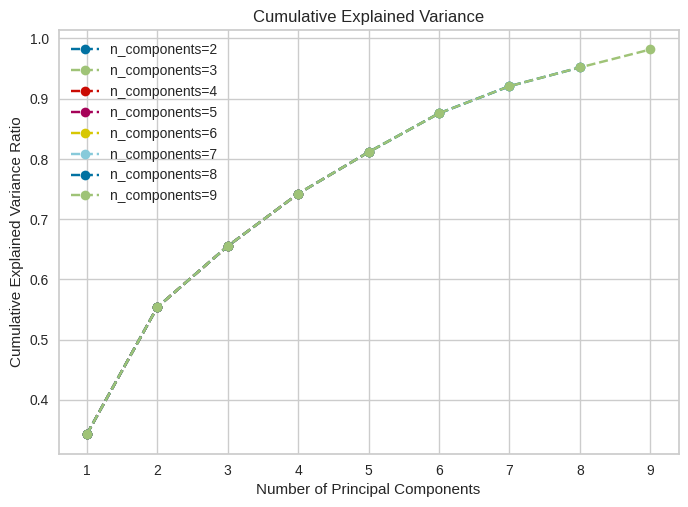

In [ ]:
# 선택된 피처만 사용
df_t = df_t[selected_features.tolist()]

# 주성분 분석 분석 실시
# 스케일링
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_t)

df_normalized = normalize(df_scaled)
df_normalized = pd.DataFrame(df_normalized)

# 적절한 차원의 개수 찾아보기
# 차원의 개수 올려보면서 관찰
for i in range(2,10) :
    pca = PCA(n_components = i)
    pca.fit(df_scaled)
    print(f'차원의 개수가 {i} 일 때')
    variance_t = 0
    variance = []
    for j in range(i) :
        v_ratio = pca.explained_variance_ratio_[j]
        variance_t += v_ratio
        variance.append(variance_t)
    plt.plot(range(1, i + 1), variance, marker='o', linestyle='--', label=f'n_components={i}')
    print(f'누적 분산은 {np.sum(pca.explained_variance_ratio_)}')

# 누적 분산 관찰 => 몇개째부터 80% 이상
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.show()

- 데이터의 설명력을 보존하기 위해 누적 분산이 80% 이상되는 지점을 선택한다면 => 차원이 5개일 때가 적절
- 여기서는 시각화를 위해 3개로 차원 축소

In [ ]:
# 차원축소
pca = PCA(n_components=3)
X_principal = pca.fit_transform(df_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2', 'P3']
X_principal.head()

,P1,P2,P3
0,-0.733342,-0.061771,-0.014195
1,0.722450,-0.545718,0.126519
2,0.320762,0.141681,0.759295
3,0.235200,0.156651,0.649293
4,-0.689121,-0.179423,0.043278


In [ ]:
# 3D 시각화
import plotly.express as px

# 3D 시각화
fig = px.scatter_3d(X_principal, x='P1', y='P2', z='P3', title='PCA 3D',
                    color=np.random.rand(len(X_principal)),  # 무작위 색상
                    opacity=0.7)

fig.update_traces(marker=dict(size=5))  # 마커 크기 조정
fig.show()

- 그다지 차원축소가 잘 이루어진 것처럼은 안보임

### **밀도기반군집**

In [ ]:
# 차원축소 (다시 차원 5개로)
pca = PCA(n_components=5)
X_principal = pca.fit_transform(df_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2', 'P3', 'P4', 'P5']
X_principal.head()

,P1,P2,P3,P4,P5
0,-0.733342,-0.061771,-0.014195,0.056650,-0.018764
1,0.722450,-0.545718,0.126519,0.042976,-0.296007
2,0.320762,0.141681,0.759295,-0.162173,0.432222
3,0.235200,0.156651,0.649293,-0.251595,0.174185
4,-0.689121,-0.179423,0.043278,0.112117,0.107072


### **밀도기반군집**
---
- 데이터를 밀도 기반으로 서로 가까운 데이터 포인트를 함께 그룹화하는 알고리즘
- eps : 각 데이터 포인트가 이웃으로 인식될 수 있는 거리 (반경)
- min_samples : 한 포인트가 핵심 포인트가 되기 위해 필요한 최소 이웃 수

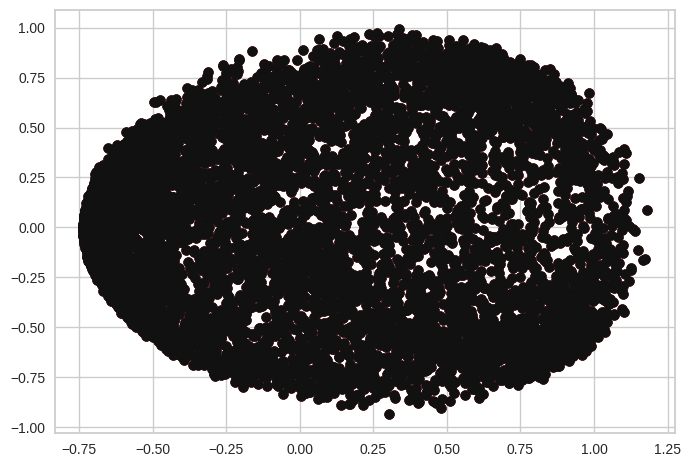

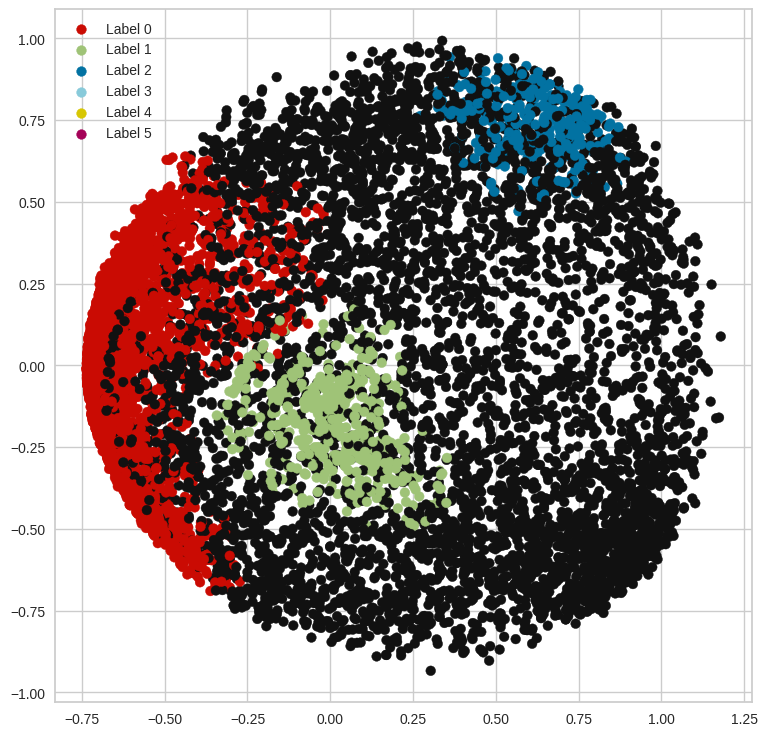

In [ ]:
# DBSCAN
# min_samples=100으로 설정했을 때
db = DBSCAN(eps=0.2, min_samples=100).fit(X_principal)
labels = db.labels_

colors = {}
colors[0] = 'r'
colors[1] = 'g'
colors[2] = 'b'
colors[3] = 'c'
colors[4] = 'y'
colors[5] = 'm'
colors[-1] = 'k'

cvec = [colors[label] for label in labels]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k']

r = plt.scatter(X_principal['P1'], X_principal['P2'], marker = 'o', color = colors[0])
g = plt.scatter(X_principal['P1'], X_principal['P2'], marker = 'o', color = colors[1])
b = plt.scatter(X_principal['P1'], X_principal['P2'], marker = 'o', color = colors[2])
c = plt.scatter(X_principal['P1'], X_principal['P2'], marker = 'o', color = colors[3])
y = plt.scatter(X_principal['P1'], X_principal['P2'], marker = 'o', color = colors[4])
m = plt.scatter(X_principal['P1'], X_principal['P2'], marker = 'o', color = colors[5])
k = plt.scatter(X_principal['P1'], X_principal['P2'], marker = 'o', color = colors[6])

plt.figure(figsize=(9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)

plt.legend((r,g,b,c,y,m,k), ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5'))
plt.show()

In [ ]:
# 노이즈 포인트 수
noise_count = np.sum(labels == -1)
# 전체 데이터 수
total_count = len(labels)
# 노이즈 비율
noise_ratio = noise_count / total_count
noise_ratio

0.577271203486423

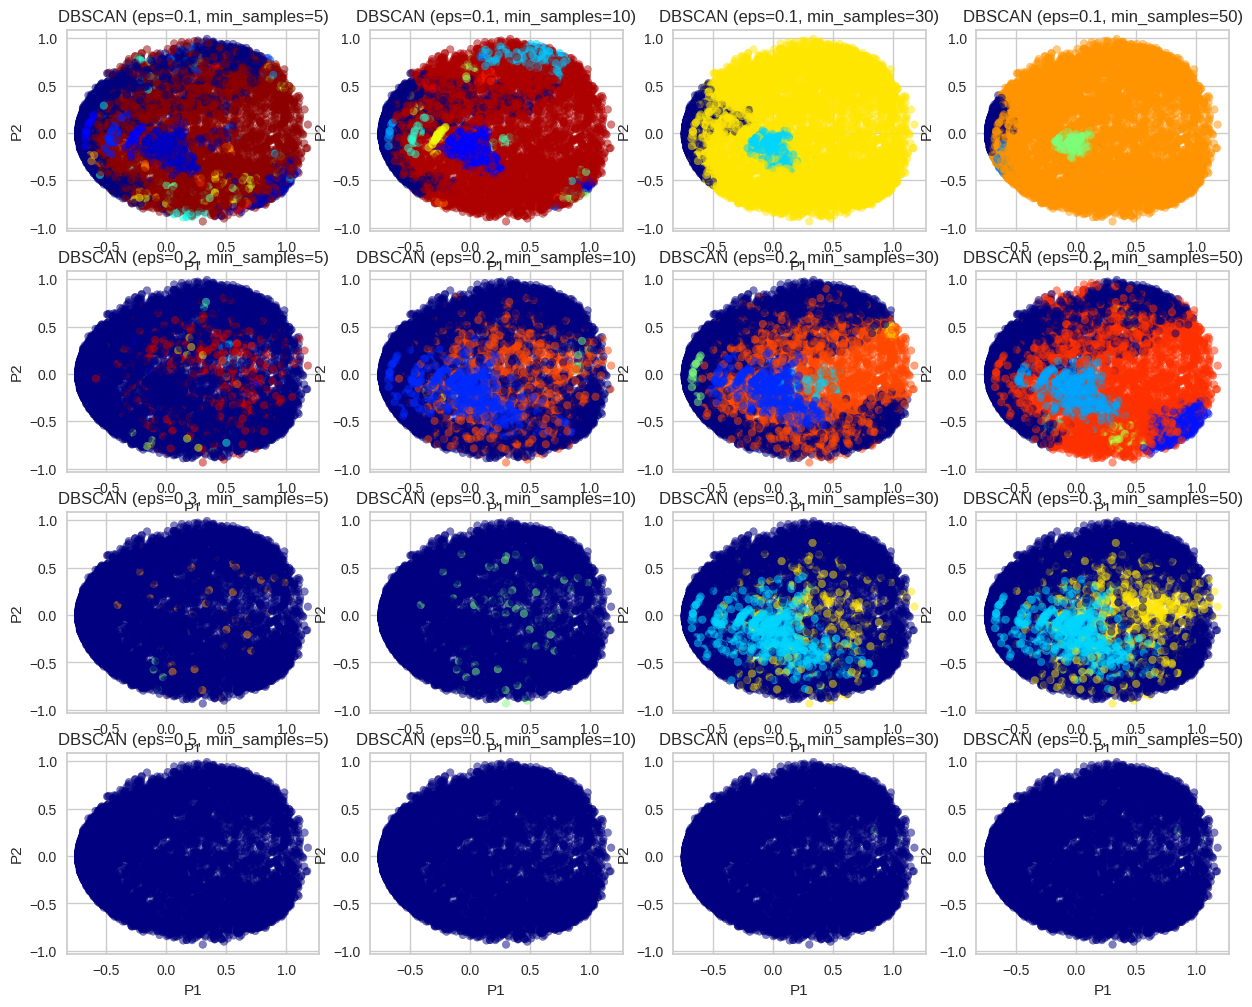

In [ ]:
# 밀도기반군집 시각화하는 함수 지정
def dbscan(eps, min_samples, ax):
    db_defaults = DBSCAN(eps=eps, min_samples=min_samples).fit(X_principal)
    labels = db_defaults.labels_

    unique_labels = set(labels)
    colors = {label: plt.cm.jet(i / float(len(unique_labels))) for i, label in enumerate(unique_labels)}
    cvec = [colors[label] for label in labels]

    ax.scatter(X_principal['P1'], X_principal['P2'], c=cvec, s=30, alpha=0.5)
    ax.set_title(f'DBSCAN (eps={eps}, min_samples={min_samples})')
    ax.set_xlabel('P1')
    ax.set_ylabel('P2')


# eps와 min_samples 리스트
eps_values = [0.1, 0.2, 0.3, 0.5]
min_samples_values = [5, 10, 30, 50]

fig, axs = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 12))

# 서브플롯
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan(eps, min_samples, axs[i, j])

plt.show()

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.8 MB/s eta 0:00:00


### **Optuna를 이용한 군집 하이퍼파라미터 튜닝**
---
- 하이퍼파라미터 튜닝 프레임워크
- random search => grid search 로 진행 가능
- 평가 기준은 실루엣 계수이며 eps와 min_samples를 탐색하며 가장 높은 실루엣 계수를 도출할 떄의 하이퍼 파라미터 탐색

In [ ]:
import optuna

def objective(trial):
    # Optuna로부터 eps와 min_samples의 값 가져오기
    eps = trial.suggest_float('eps', 0.01, 0.3)  # eps의 범위 설정
    min_samples = trial.suggest_int('min_samples', 10, 100)  # min_samples의 범위 설정

    # DBSCAN 모델 생성
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X_principal)

    # 군집이 형성되지 않으면 실루엣 계수를 계산할 수 없음
    if len(set(labels)) < 2:  # 군집이 2개 미만인 경우
        return -1  # 실루엣 계수가 없으므로 -1 반환

    # 실루엣 계수 계산
    silhouette_avg = silhouette_score(X_principal, labels)

    return silhouette_avg

# Optuna 스터디 생성
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # 50번 시도

# 최적의 파라미터 및 실루엣 계수 출력
best_params = study.best_params
best_silhouette = study.best_value
print("Best parameters:", best_params)
print("Best silhouette score:", best_silhouette)

[I 2024-10-14 00:25:18,349] A new study created in memory with name: no-name-c88a047b-3be5-46a9-bf65-5c7ae98057e5
[I 2024-10-14 00:25:20,237] Trial 0 finished with value: -0.18430178334931274 and parameters: {'eps': 0.07230642440373895, 'min_samples': 50}. Best is trial 0 with value: -0.18430178334931274.
[I 2024-10-14 00:25:20,324] Trial 1 finished with value: -1.0 and parameters: {'eps': 0.03528085382386962, 'min_samples': 83}. Best is trial 0 with value: -0.18430178334931274.
[I 2024-10-14 00:25:21,964] Trial 2 finished with value: 0.12769255616418498 and parameters: {'eps': 0.27413821799063404, 'min_samples': 73}. Best is trial 2 with value: 0.12769255616418498.
[I 2024-10-14 00:25:22,054] Trial 3 finished with value: -1.0 and parameters: {'eps': 0.03809424317532871, 'min_samples': 73}. Best is trial 2 with value: 0.12769255616418498.
[I 2024-10-14 00:25:24,043] Trial 4 finished with value: -0.12807101116270547 and parameters: {'eps': 0.20765347516464522, 'min_samples': 11}. Best i

Best parameters: {'eps': 0.19213341791033506, 'min_samples': 67}
Best silhouette score: 0.182219463044648


### **contour plot**
- 하이퍼 파라미터 탐색 범위 관찰

In [ ]:
from optuna.visualization import plot_contour

# 컨투어 플롯
fig = plot_contour(study)
fig.show()

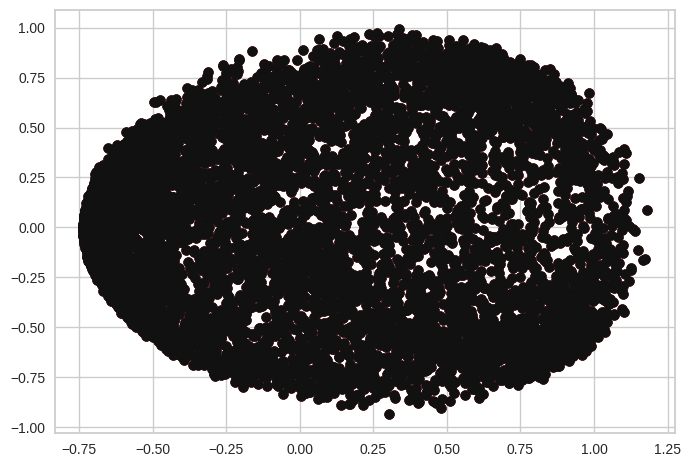

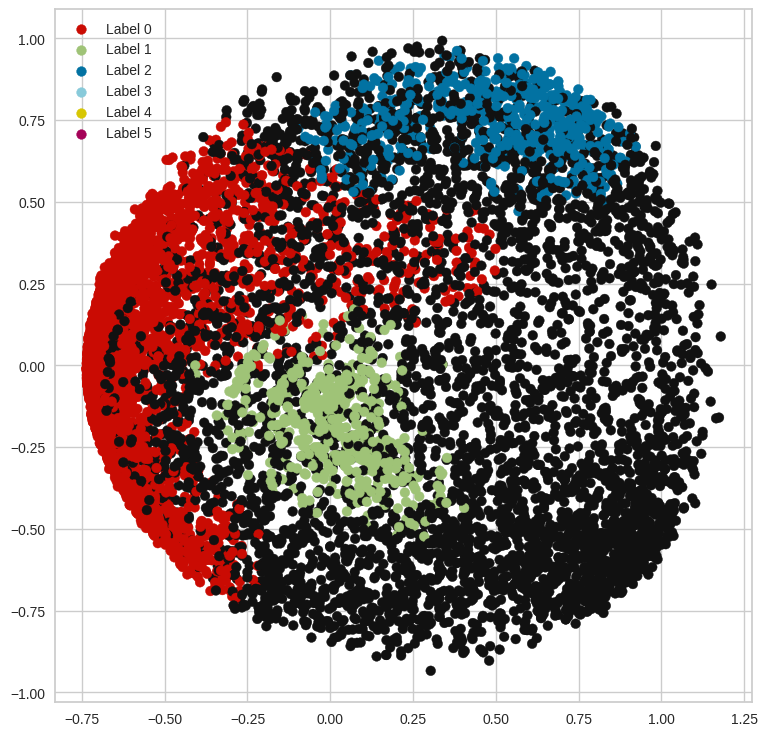

In [ ]:
# 최적의 파라미터로 DBSCAN 수행
db = DBSCAN(eps= 0.19213341791033506, min_samples=67).fit(X_principal)
labels = db.labels_

colors = {}
colors[0] = 'r'
colors[1] = 'g'
colors[2] = 'b'
colors[3] = 'c'
colors[4] = 'y'
colors[5] = 'm'
colors[-1] = 'k'

cvec = [colors[label] for label in labels]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k']

r = plt.scatter(X_principal['P1'], X_principal['P2'], marker = 'o', color = colors[0])
g = plt.scatter(X_principal['P1'], X_principal['P2'], marker = 'o', color = colors[1])
b = plt.scatter(X_principal['P1'], X_principal['P2'], marker = 'o', color = colors[2])
c = plt.scatter(X_principal['P1'], X_principal['P2'], marker = 'o', color = colors[3])
y = plt.scatter(X_principal['P1'], X_principal['P2'], marker = 'o', color = colors[4])
m = plt.scatter(X_principal['P1'], X_principal['P2'], marker = 'o', color = colors[5])
k = plt.scatter(X_principal['P1'], X_principal['P2'], marker = 'o', color = colors[6])

plt.figure(figsize=(9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)

plt.legend((r,g,b,c,y,m,k), ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5'))
plt.show()

In [ ]:
# 노이즈 포인트 수
noise_count = np.sum(labels == -1)
# 전체 데이터 수
total_count = len(labels)
# 노이즈 비율
noise_ratio = noise_count / total_count
noise_ratio

0.5129064699966477